In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import trendvis
%matplotlib inline
#https://blog.csdn.net/u010383605/article/details/79303877
#https://matplotlib.org/gallery/text_labels_and_annotations/date_index_formatter.html

In [2]:
def format_date(x, pos=None):
        thisind = np.clip(int(x + 0.5), 0, N - 1)
        return date[thisind].strftime('%Y-%m-%d')

In [3]:
df=pd.read_csv("all_latlon-ok.csv")

In [4]:
df.head()

,AREA,PERIMETER,LEVEL1_,LEVEL1_ID,AD2004,NAME2004,index_right,lat_bin,lon_bin,BJC,...,min_prs,mean_rh,min_rh,year,month,day,hour,PC_prl,PC_yrd,PC_jjj
0,54.4821,70.1328,1,1,230000,HeiLongJiang,1669,45.0,130.5,2016-07-18 04:38:00,...,9760.0,76.0,41.0,2016,7,18,5,4,3,3
1,54.4821,70.1328,1,1,230000,HeiLongJiang,1469,45.0,130.5,2016-07-02 04:40:00,...,9700.0,84.0,66.0,2016,7,2,5,3,3,3
2,54.4821,70.1328,1,1,230000,HeiLongJiang,773,45.0,130.5,2015-06-30 04:38:00,...,9646.0,60.0,35.0,2015,6,30,5,4,4,4
3,54.4821,70.1328,1,1,230000,HeiLongJiang,2912,45.0,130.5,2018-07-24 04:41:00,...,9734.0,78.0,50.0,2018,7,24,5,3,3,2
4,54.4821,70.1328,1,1,230000,HeiLongJiang,1177,47.0,123.5,2015-08-21 05:02:00,...,9883.0,86.0,61.0,2015,8,21,5,3,2,1


In [5]:
yrd_list = list(["AnHui","JiangSu","ShangHai","ZheJiang"])
yrd=df[df.NAME2004.isin(yrd_list)]

In [6]:
avg_yrd=yrd.groupby(['DATE']).mean()
avg_yrd['CCN_1.0_cm3']=avg_yrd['CCN_1.0_cm3'].map( lambda x: x if x<10000 else np.nan)

In [7]:
avg_yrd

,AREA,PERIMETER,LEVEL1_,LEVEL1_ID,AD2004,index_right,lat_bin,lon_bin,AMR_lowest,AMR_surf,...,min_prs,mean_rh,min_rh,year,month,day,hour,PC_prl,PC_yrd,PC_jjj
DATE,,,,,,,,,,,,,,,,,,,,,
2013-06-01,7.854290,29.086694,19.800000,19.800000,320000.000000,3.000000,30.900000,119.500000,NaN,NaN,...,10016.200000,83.400000,63.500000,2013.0,6.0,1.0,5.0,3.0,1.0,1.0
2013-06-05,9.739760,30.066400,15.000000,15.000000,320000.000000,7.000000,32.000000,119.000000,NaN,NaN,...,10079.500000,71.000000,48.500000,2013.0,6.0,5.0,5.0,2.0,3.0,3.0
2013-06-06,7.382922,28.841768,21.000000,21.000000,320000.000000,9.500000,31.000000,120.250000,NaN,NaN,...,10064.250000,76.125000,60.125000,2013.0,6.0,6.0,5.0,2.0,3.0,3.0
2013-06-12,9.599275,39.391750,17.000000,17.000000,325000.000000,22.500000,30.875000,120.125000,NaN,NaN,...,10075.000000,80.625000,62.875000,2013.0,6.0,12.0,5.0,4.0,2.0,3.0
2013-06-17,9.739760,30.066400,15.000000,15.000000,320000.000000,27.000000,33.833333,118.666667,NaN,NaN,...,9937.333333,73.000000,46.666667,2013.0,6.0,17.0,5.0,3.0,3.0,2.0
2013-06-18,5.166570,18.291785,25.000000,25.000000,315000.000000,30.500000,31.500000,120.750000,NaN,NaN,...,9944.000000,68.250000,51.000000,2013.0,6.0,18.0,5.0,4.0,3.0,2.0
2013-06-21,9.458790,48.717100,19.000000,19.000000,330000.000000,35.000000,28.000000,119.500000,NaN,NaN,...,9966.000000,72.000000,43.000000,2013.0,6.0,21.0,5.0,3.0,3.0,4.0
2013-06-23,7.798096,32.816834,20.600000,20.600000,322000.000000,39.000000,30.900000,120.000000,NaN,NaN,...,10009.700000,81.900000,57.900000,2013.0,6.0,23.0,5.0,4.0,3.0,3.0
2013-06-27,9.669517,34.729075,16.000000,16.000000,322500.000000,53.500000,31.250000,119.750000,NaN,NaN,...,9985.875000,84.125000,67.875000,2013.0,6.0,27.0,5.0,3.0,3.0,1.0


In [8]:
N = len(avg_yrd)
ind = np.arange(N)  # the evenly spaced plot indices

In [9]:
len(avg_yrd[avg_yrd.year==2013])

32

In [10]:
len(avg_yrd[avg_yrd.year==2014])

29

In [11]:
len(avg_yrd[avg_yrd.year==2015])

35

In [12]:
len(avg_yrd[avg_yrd.year==2016])

36

In [13]:
len(avg_yrd[avg_yrd.year==2017])

37

In [14]:
len(avg_yrd[avg_yrd.year==2018])

24

In [15]:
yrd=pd.DataFrame(avg_yrd)

In [16]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [17]:
yrd=pd.DataFrame(avg_yrd.index)

In [18]:
yrd

,DATE
0,2013-06-01
1,2013-06-05
2,2013-06-06
3,2013-06-12
4,2013-06-17
5,2013-06-18
6,2013-06-21
7,2013-06-23
8,2013-06-27
9,2013-06-28


In [19]:
avg_yrd.index[:32]

Index(['2013-06-01', '2013-06-05', '2013-06-06', '2013-06-12', '2013-06-17',
       '2013-06-18', '2013-06-21', '2013-06-23', '2013-06-27', '2013-06-28',
       '2013-07-02', '2013-07-03', '2013-07-07', '2013-07-08', '2013-07-09',
       '2013-07-18', '2013-07-23', '2013-07-24', '2013-07-25', '2013-07-29',
       '2013-07-30', '2013-08-03', '2013-08-04', '2013-08-05', '2013-08-14',
       '2013-08-15', '2013-08-19', '2013-08-20', '2013-08-21', '2013-08-24',
       '2013-08-25', '2013-08-26'],
      dtype='object', name='DATE')

In [20]:
avg_yrd.index[32:61]

Index(['2014-06-09', '2014-06-10', '2014-06-19', '2014-06-20', '2014-06-24',
       '2014-06-25', '2014-06-26', '2014-07-01', '2014-07-05', '2014-07-06',
       '2014-07-07', '2014-07-10', '2014-07-12', '2014-07-17', '2014-07-21',
       '2014-07-22', '2014-07-23', '2014-07-27', '2014-07-28', '2014-08-02',
       '2014-08-07', '2014-08-12', '2014-08-13', '2014-08-17', '2014-08-18',
       '2014-08-22', '2014-08-23', '2014-08-27', '2014-08-28'],
      dtype='object', name='DATE')

In [21]:
avg_yrd.index[61:96]

Index(['2015-06-02', '2015-06-08', '2015-06-17', '2015-06-18', '2015-06-22',
       '2015-06-27', '2015-06-28', '2015-06-29', '2015-07-08', '2015-07-09',
       '2015-07-13', '2015-07-14', '2015-07-15', '2015-07-19', '2015-07-20',
       '2015-07-24', '2015-07-25', '2015-07-26', '2015-07-29', '2015-07-30',
       '2015-07-31', '2015-08-01', '2015-08-05', '2015-08-09', '2015-08-10',
       '2015-08-12', '2015-08-15', '2015-08-16', '2015-08-17', '2015-08-20',
       '2015-08-21', '2015-08-22', '2015-08-26', '2015-08-27', '2015-08-30'],
      dtype='object', name='DATE')

In [22]:
avg_yrd.index[96:132]

Index(['2016-06-08', '2016-06-09', '2016-06-10', '2016-06-13', '2016-06-14',
       '2016-06-19', '2016-06-20', '2016-06-24', '2016-06-26', '2016-06-29',
       '2016-06-30', '2016-07-05', '2016-07-06', '2016-07-07', '2016-07-10',
       '2016-07-12', '2016-07-15', '2016-07-16', '2016-07-17', '2016-07-18',
       '2016-07-21', '2016-07-26', '2016-07-28', '2016-08-01', '2016-08-02',
       '2016-08-05', '2016-08-06', '2016-08-11', '2016-08-12', '2016-08-13',
       '2016-08-16', '2016-08-17', '2016-08-18', '2016-08-21', '2016-08-23',
       '2016-08-27'],
      dtype='object', name='DATE')

In [23]:
avg_yrd.index[132:169]

Index(['2017-06-06', '2017-06-07', '2017-06-11', '2017-06-18', '2017-06-22',
       '2017-06-23', '2017-06-27', '2017-06-28', '2017-06-29', '2017-07-02',
       '2017-07-04', '2017-07-08', '2017-07-09', '2017-07-13', '2017-07-14',
       '2017-07-18', '2017-07-19', '2017-07-20', '2017-07-24', '2017-07-25',
       '2017-07-29', '2017-07-30', '2017-07-31', '2017-08-03', '2017-08-04',
       '2017-08-05', '2017-08-09', '2017-08-10', '2017-08-14', '2017-08-15',
       '2017-08-19', '2017-08-20', '2017-08-21', '2017-08-24', '2017-08-25',
       '2017-08-30', '2017-08-31'],
      dtype='object', name='DATE')

In [24]:
avg_yrd.index[169:]

Index(['2018-06-05', '2018-07-01', '2018-07-02', '2018-07-06', '2018-07-07',
       '2018-07-11', '2018-07-12', '2018-07-16', '2018-07-17', '2018-07-21',
       '2018-07-22', '2018-07-23', '2018-08-01', '2018-08-02', '2018-08-06',
       '2018-08-07', '2018-08-08', '2018-08-11', '2018-08-13', '2018-08-17',
       '2018-08-18', '2018-08-19', '2018-08-22', '2018-08-27'],
      dtype='object', name='DATE')

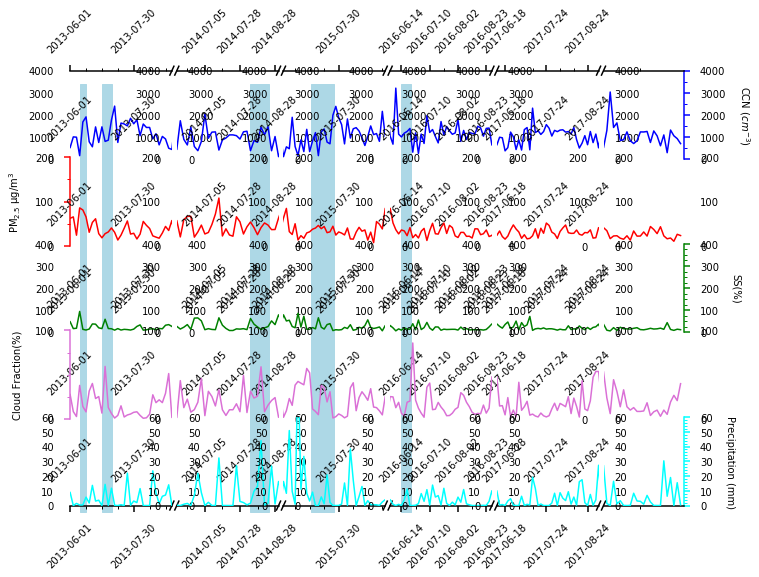

In [25]:
# Initialize XGrid and twin axes
ex2 = trendvis.XGrid([5, 5,5,5,5], xratios=[5, 5,5,5,5,4], figsize=(11, 8),
                     startside='right')
#ex2.make_twins([0, 1])

# Convenience function
trendvis.plot_data(ex2,
    [[(ind, avg_yrd['CCN_1.0_cm3'], 'blue')],
     [(ind, avg_yrd["PM25"], 'red')],
     [(ind, avg_yrd["SS_1.0_mg"]*100, 'green')],
     [(ind, avg_yrd["Cloud_fra"]*100, 'orchid')],
     [(ind, avg_yrd["rain"]/10, 'cyan')]],
    lw=1.5, marker=None)

# Adjust twinned y-axis positions for readability
ex2.move_spines(twin_shift=0.6)

# For any other kind of plot (fill_between, scatter, errorbar, etc),
# get axis and plot directly
# Note: ex2.axes[2][2] == ex2.get_axis(0, xpos=2, is_twin=True)
#for ax in ex2.axes[2]:
#    ax.fill_between(ind, avg_yrd["Cloud_fra"]*100+0.1, avg_yrd["Cloud_fra"]*100-0.1,
 #                   edgecolor='none', color='darkorange')

# Handle axis ticks
ex2.cleanup_grid()
ex2.set_spinewidth(1.5)
ex2.autocolor_spines()
ex2.set_all_ticknums([(20, 5), (10, 5),(20, 5),(10, 5),(15, 5),(40, 20)],
                     [(1000, 500), (100, 50), (100, 25), (100, 25),(10, 2)])
ex2.set_ticks(major_dim=(6, 1.5), minor_dim=(3, 1))

ex2.set_ylabels(['CCN $(cm^{-3})$', 'PM$_{2.5}$ μg/m$^{3}$', 'SS(%)', 'Cloud Fraction(%)',"Precipitation (mm)"])

# Rotate x-axis tick labels
for ax in ex2.fig.axes:
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

# Draw a vertical bar behind the data - horizontal bars available too
ex2.draw_bar(ex2.axes[4][0], ex2.axes[0][0], (3, 5), color='lightblue')
ex2.draw_bar(ex2.axes[4][0], ex2.axes[0][0], (10, 13), color='lightblue')
ex2.draw_bar(ex2.axes[4][0], ex2.axes[0][0], (56, 62), color='lightblue')
ex2.draw_bar(ex2.axes[4][0], ex2.axes[0][0], (75, 82), color='lightblue')
ex2.draw_bar(ex2.axes[4][0], ex2.axes[0][0], (103, 106), color='lightblue')

# Ok to set axis limits after drawing on figure using TrendVis methods,
# TrendVis will reset the bar to the right place!
ex2.set_xlim([(0, 0, 32), (1, 32, 61),(2, 61, 96),(3, 96, 132),(4, 132, 169),(5, 169, 193)])
ex2.set_ylim([(0, 0, 4000),(1, 0, 200),(2, 0, 400),(3, 0, 100),(4, 0, 60)])

# matplotlib annotations supported
#ex2.get_axis(0).text(0, 0.75, 'Text')

# Cutouts instead of frames
ex2.draw_cutout(lw=1.5)

# Set the suptitle and compact the plot
#ex2.fig.suptitle('YRD', fontsize=16, y=1.05);
ex2.fig.subplots_adjust(hspace=-0.1,wspace=0.3)
times=pd.to_datetime(avg_yrd.index,format='%Y-%m-%d')
date = times.astype('O')
ex2.get_axis(1).xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ex2.axes[0][1].xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ex2.axes[0][2].xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ex2.axes[0][3].xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ex2.axes[0][4].xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ex2.axes[0][5].xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
#ex2.get_axis().xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
plt.savefig("yrd_time_series-ok.png",dpi=600)

In [26]:
import seaborn as sns

In [27]:
data_yrd=avg_yrd[['CCN_1.0_cm3',"PM25","SS_1.0_mg","Cloud_fra","rain"]]

In [28]:
data_yrd

,CCN_1.0_cm3,PM25,SS_1.0_mg,Cloud_fra,rain
DATE,,,,,
2013-06-01,525.800000,62.083333,0.480000,0.276220,88.600000
2013-06-05,1007.000000,65.250000,0.170000,0.082900,0.000000
2013-06-06,993.000000,23.887500,0.186250,0.027200,14.500000
2013-06-12,158.375000,85.555556,0.946250,0.378750,3.750000
2013-06-17,1680.944444,80.904762,0.136667,0.140572,4.166667
2013-06-18,1911.000000,65.300000,0.105000,0.079800,57.000000
2013-06-21,786.000000,30.500000,0.150000,0.315400,17.000000
2013-06-23,559.533333,52.788889,0.380667,0.400853,136.700000
2013-06-27,1458.750000,60.979167,0.370833,0.231000,30.375000


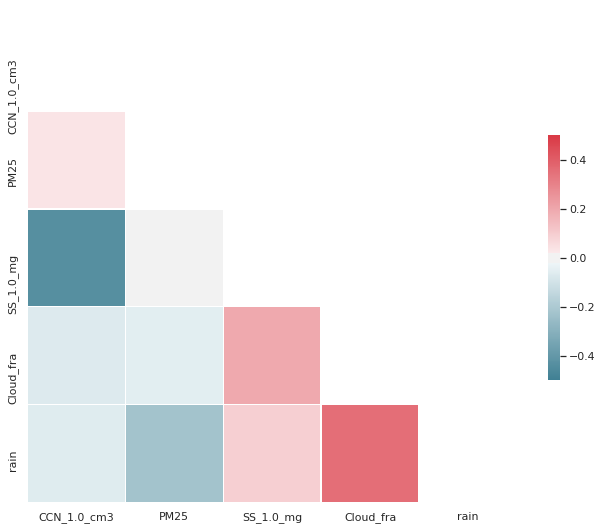

In [51]:
sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)

# Compute the correlation matrix
corr = data_yrd.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, clim=(-0.5, 0.5),vmax=.5, vmin=-0.5,center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

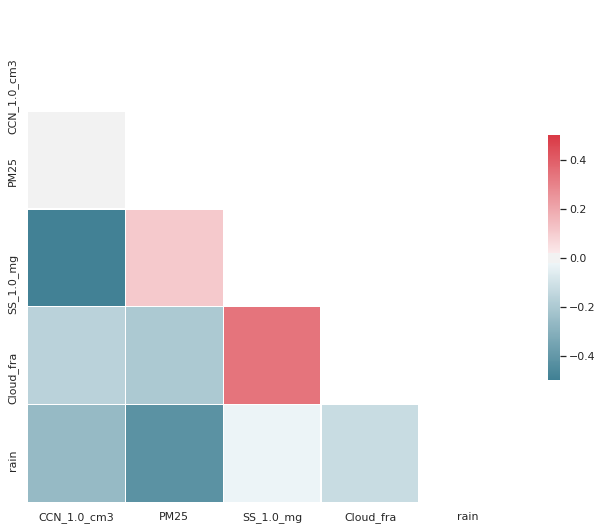

In [52]:
avg_yrd3=avg_yrd[avg_yrd["PC_yrd"]==3]
data_yrd3=avg_yrd3[['CCN_1.0_cm3',"PM25","SS_1.0_mg","Cloud_fra","rain"]]
sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)

# Compute the correlation matrix
corr = data_yrd1.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, clim=(-0.5, 0.5),vmax=.5, vmin=-0.5,center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

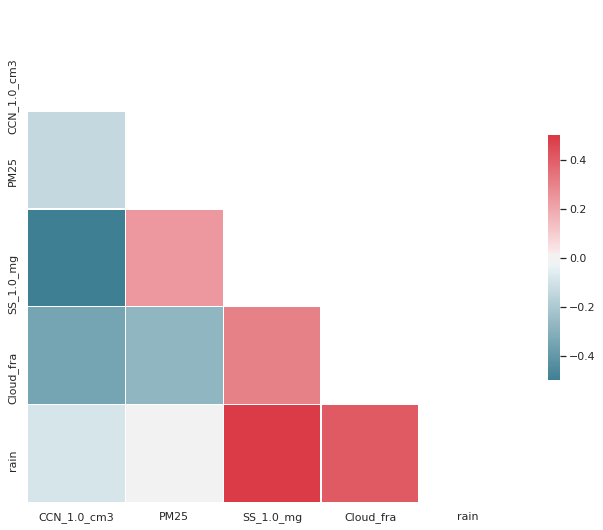

In [54]:
avg_yrd4=avg_yrd[avg_yrd["PC_yrd"]==4]
data_yrd4=avg_yrd4[['CCN_1.0_cm3',"PM25","SS_1.0_mg","Cloud_fra","rain"]]
corr = data_yrd4.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, clim=(-0.5, 0.5),vmax=.5, vmin=-0.5,center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

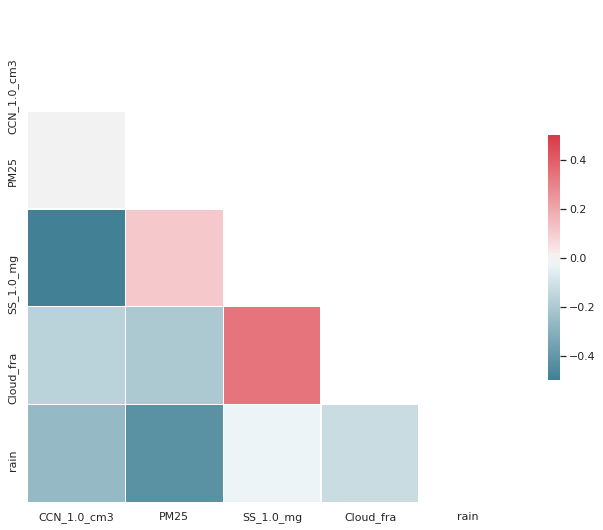

In [56]:
avg_yrd1=avg_yrd[avg_yrd["PC_yrd"]==1]
data_yrd1=avg_yrd1[['CCN_1.0_cm3',"PM25","SS_1.0_mg","Cloud_fra","rain"]]
corr = data_yrd1.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,clim=(-0.5, 0.5),vmax=.5, vmin=-0.5,center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

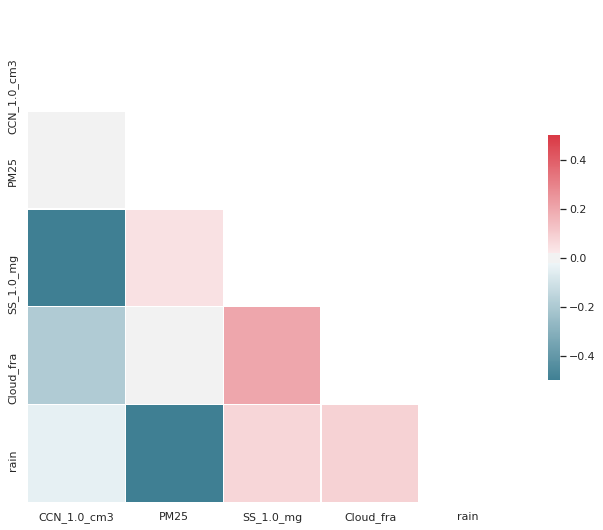

In [49]:
avg_yrd2=avg_yrd[avg_yrd["PC_yrd"]==2]
data_yrd2=avg_yrd2[['CCN_1.0_cm3',"PM25","SS_1.0_mg","Cloud_fra","rain"]]
corr = data_yrd2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, clim=(-0.5, 0.5),vmax=.5, vmin=-0.5,center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [68]:
data_choose=data_yrd.iloc[[3,4,5,10,11,12,13]]

In [69]:
data_choose

,CCN_1.0_cm3,PM25,SS_1.0_mg,Cloud_fra,rain
DATE,,,,,
2013-06-06,993.000000,44.099256,0.186250,0.031786,7.250000
2013-06-07,3216.375000,26.127273,0.834583,0.482630,383.500000
2013-06-08,1373.000000,19.703463,0.150714,0.515093,100.272727
2013-06-17,1754.166667,70.857143,0.132500,0.102058,5.750000
2013-06-18,1361.055556,59.733214,0.209444,0.068915,39.600000
2013-06-19,4031.833333,67.712500,0.573333,0.123188,130.750000
2013-06-21,1072.000000,133.654762,0.165000,0.185700,5.833333


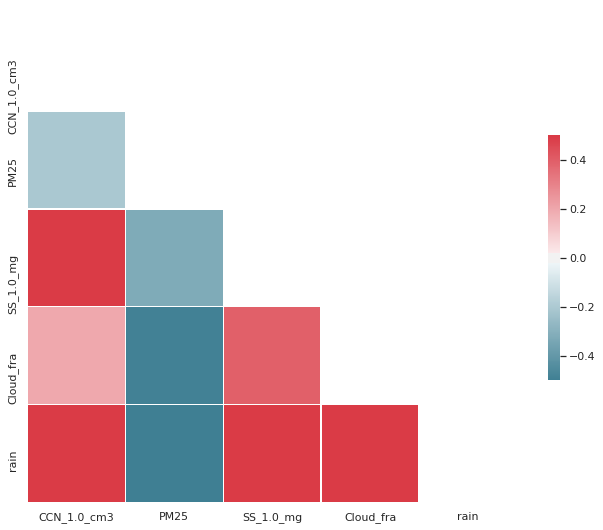

In [70]:
corr = data_choose.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, clim=(-0.5, 0.5),vmax=.5, vmin=-0.5,center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})